In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import basicdifeq as bde

In [ ]:
###############################################################################
# SISTEMA DE ECUACIONES DIFERENCIALES PREDEFINIDOS
sistemas_predefinidos = {
    1: ("Van der Pol", "mu*(1-x**2)*x - y", "x", ["mu"]),
    2: ("Lotka-Volterra", "a*x - b*x*y", "c*x*y - d*y", ["a", "b", "c", "d"]),
    3: ("Rayleigh", "x*(1-x**2-y**2)", "y*(1-x**2-y**2)", []),
    4: ("FitzHugh-Nagumo", "x - (x**3)/3 - y + I", "epsilon*(x + a - b*y)", ["I", "epsilon", "a", "b"])
}

###############################################################################
# OBTENER LA EXPRESIÓN DE LA ECUACIÓN DIFERENCIAL
seleccionar_sistema = input("¿Desea seleccionar un sistema? (s/n): ").lower()
if seleccionar_sistema == "s":
    print("Selecciona un sistema:\n")
    for key, value in sistemas_predefinidos.items():
        print(f"{key}. {value[0]}")
    sistema = int(input(" = ")) # Opción seleccionada   
    for i in sistemas_predefinidos[sistema][3]: # Parámetros del sistema
        exec(f"{i}=float(input('{i} = '))")
    print("Sistema seleccionado:")
    f1_original = sistemas_predefinidos[sistema][1]
    f2_original = sistemas_predefinidos[sistema][2]
    nombre = sistemas_predefinidos[sistema][0]
else:
    f1_original = input("dx/dt = ")
    f2_original = input("dy/dt = ")
    nombre = input("Ingresar el nombre del sistema = ")

print(f"El sistema {nombre} se expresa como:")
print(f"dx/dt = {f1_original}")
print(f"dy/dt = {f2_original}")

Selecciona un sistema:

1. Van der Pol
2. Lotka-Volterra
3. Rayleigh
4. FitzHugh-Nagumo
Sistema seleccionado:
El sistema Lotka-Volterra se expresa como:
dx/dt = a*x - b*x*y
dy/dt = c*x*y - d*y


In [18]:
linealizar = input("¿Desea linealizar el sistema? (s/n): ").lower()
nulclinas = input("¿Desea calcular las nulclinas? (s/n): ").lower()

In [22]:
###############################################################################
# JACOBIANO
if linealizar == "s":
    x, y = sp.symbols('x y')
    f1 = eval(f1_original)
    f2 = eval(f2_original)
    
    # Calcular Jacobiano
    J = bde.calcular_jacobiano(f1, f2, [x, y])

    print("Matriz Jacobiana del sistema:")
    sp.pprint(J)
    
    # Evaluar en un punto de equilibrio (ejemplo en (0,0))
    J_eq = J.subs({x: 0, y: 0})
    print("\nJacobiano evaluado en (0,0):")
    sp.pprint(J_eq)
    
    # Calcular valores propios (para análisis de estabilidad)
    eigenvals = J_eq.eigenvals()
    print("\nValores propios en (0,0):")
    sp.pprint(eigenvals)

    # Sistema linealizado
    f1_linealizado = str(np.array(J_eq)[0][0] * x + np.array(J_eq)[0][1] * y)
    f2_linealizado = str(np.array(J_eq)[1][0] * x + np.array(J_eq)[1][1] * y)
    print("\nSistema linealizado:")
    print(f"dx/dt = {f1_linealizado}")
    print(f"dy/dt = {f2_linealizado}")

Matriz Jacobiana del sistema:
⎡0.5 - 0.4⋅y    -0.4⋅x   ⎤
⎢                        ⎥
⎣   0.3⋅y     0.3⋅x - 0.2⎦

Jacobiano evaluado en (0,0):
⎡0.5   0  ⎤
⎢         ⎥
⎣ 0   -0.2⎦

Valores propios en (0,0):
{-0.2: 1, 0.5: 1}

Sistema linealizado:
dx/dt = 0.5*x
dy/dt = -0.2*y


In [23]:
###############################################################################
# NULCLINAS
if nulclinas == "s":
    #x, y = sp.symbols('x y')
    #f1 = eval(f1_original)
    #f2 = eval(f2_original)

    # Calcular nulclinas
    nulclina_x = sp.solve(f1, y)  # Resuelve dx/dt = 0 para y
    nulclina_y = sp.solve(f2, y)  # Resuelve dy/dt = 0 para y

    print("Nulclinas:")
    print(f"Nulclina de x (dx/dt = 0): y = {nulclina_x}")
    print(f"Nulclina de y (dy/dt = 0): y = {nulclina_y}")

Nulclinas:
Nulclina de x (dx/dt = 0): y = [1.25000000000000]
Nulclina de y (dy/dt = 0): y = [0.0]


In [16]:
mu = 0.5
f1 = "2*x-mu*y"
f2 = "x+y"
z = np.array([1,2])
print(bde.f(z,f1,f2,{"mu":mu}))
RK = bde.runge_kutta(f1,f2,z,0.1,300,{"mu":0.5})
print(RK)

1.0
[1. 3.]
1.0
1.0250000000000001
1.0225
1.0439375
1.0442489583333332
1.063096848958333
1.0593974765624998
1.073200584440104
1.0735971980913628
1.083592245109619
1.0783815196742865
1.0814776855388823
1.0819777076817223
1.079731867777703
1.0726326311190897
1.0611858565576733
1.0618109178100728
1.0431069499210708
1.0336650365014075
1.002920380765456
1.0036960414924359
0.9633201020069957
0.950990610824852
0.8950910320461931
0.8960474135575898
0.827592078841918
0.8117234822998323
0.723494663763395
0.724667167644613
0.6203002685428189
0.6001160638797707
0.4708142849547863
0.472244410436256
0.322438443341865
0.2970160207124799
0.11603347878856818
0.11776974867289614
-0.0890140568887765
-0.12076768865223331
-0.36624641793687873
-0.3641474117493346
-0.6418270410402882
-0.6812030641104974
-1.006600528026587
-1.0040729479898989
-1.369373057404275
-1.4178926178914946
-1.8417019045715768
-1.8386693483156429
-2.311616613188979
-2.3710670194930064
-2.9153879717506617
-2.911761998751646
-3.516257693

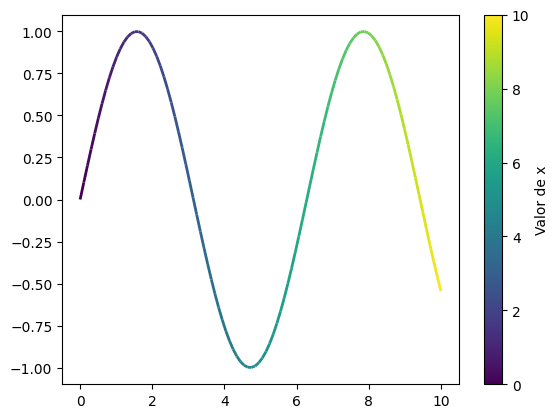

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Datos de tu gráfica
x_rk_lineal = np.linspace(0, 10, 100)
y_rk_lineal = np.sin(x_rk_lineal)

# Crear segmentos de la línea
points = np.array([x_rk_lineal, y_rk_lineal]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Crear el gradiente
norm = plt.Normalize(0, 10)  # Normalizar los valores de x
lc = LineCollection(segments, cmap='viridis', norm=norm)
lc.set_array(x_rk_lineal)  # Asignar los valores de x al gradiente
lc.set_linewidth(2)

# Graficar
fig, ax = plt.subplots()
line = ax.add_collection(lc)
ax.autoscale()
plt.colorbar(line, ax=ax, label='Valor de x')  # Barra de colores
plt.show()


In [2]:
import basicdifeq as bd

A = [[0, 0.5, 0], [-1, 0, 0], [0, -0.5, 0]]
B = [[0, 1, 0], [0, 0, 0], [0, 0, 0]]

f1 = bd.hilbert_system(A)
f2 = bd.hilbert_system(B)

print(f"dy/dt = {f1}")
print(f"dx/dt = {f2}")


dy/dt = 0.5*y-1*x-0.5*x**2*y
dx/dt = 1*y


In [52]:
import math
import numpy as np
# Function to calculate the average systen diferential equation
def average_system(A,B):
    R = [[0,0,0],[0,0,0],[0,0,0]]
    for i in range(len(A)):
        for j in range(len(A[0])):
                        # If i is even and j is odd
            if i % 2 == 0 and (j+1) % 2 == 0:
                print(f"i even {i} and j odd {j}")
                R[i][j]=1/(2**(i+j+1)*math.factorial(int((i+j+1)/2)))
                R[i][j]=R[i][j]*(math.factorial(i)*math.factorial(j+1))/(math.factorial(int(i/2))*math.factorial(int((j+1)/2)))*A[i][j]
            # If i is odd and j is even
            elif (i+1) % 2 == 0 and j % 2 == 0:
                print(F"i odd: {i}, j even: {j}")
                R[i][j]=1/(2**(i+j+1)*math.factorial(int((i+j+1)/2)))
                R[i][j]=R[i][j]*(math.factorial(i+1)*math.factorial(j))/(math.factorial(int((i+1)/2))*math.factorial(int(j/2)))*B[i][j]
            else:
                R[i][j]=0
    return R

In [35]:
(4+1)%2

1

In [3]:
import basicdifeq as bd
#A =[[0, 0.5, 0],[-1,0,0],[0,-0.5,0]]
#B =[[0,1,0],[0,1,0],[0,0,-3]]
A = [[0, 0.5, 0, -0.5], [-1, 0, 0, 0], [0, 0, 0, 0],[0,0,0,0]]
B = [ [0 ,1, 0, 0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
f1 = bd.hilbert_system(A)
f2 = bd.hilbert_system(B)
print(f"dy/dt = {f1}")
print(f"dx/dt = {f2}")
R = bd.average_system(A,B)
print("Average system differential equation:")
R_poly = bd.polynomial_averaging(R)
print(R_poly)

dy/dt = 0.5*y-0.5*y**3-1*x
dx/dt = 1*y


IndexError: list assignment index out of range

In [55]:
A = [1, 2, 3, 4, 5]
print(A[1])

2


In [11]:
import sympy as sp
from sympy import symbols
R = [[0, 2, 0], [4, 0, 6], [0, 8, 0]]
D = ""
r = symbols('r')
cont = 0
# Dimensions of the matrix
n = len(R)
m = len(R[0])
R_transform = [0, 0, 0, 0, 0]
for i in range(n):
    for j in range(m):
        R_transform[i+j] += R[i][j]
# Create the polynomial
p = len(R_transform)
for i in range(p):
    if R_transform[i] != 0:
        cont += 1
        if i == 0:
            D = str(R_transform[i])
        elif i > 0:
            if R_transform[i] > 0 and cont > 1:
                D += "+"
            D += str(R_transform[i])
            if i == 1:
                D += "*r"
            else:
                D += "*r**" + str(i)
    
print(R_transform)  
print(D)     
    

[0, 6, 0, 14, 0]
6*r+14*r**3
